<a href="https://colab.research.google.com/github/LauraJDiaz/Ciencia-De-Datos/blob/main/Ejercicio_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajando con medidas centrales#


1.   Analizando dataframe
2.   Overview de los datos
3.   Obtener las medidas centrales
4.   Analizar gráficas




In [1]:
#Instalar librerias

!pip install statsmodels
!pip install wquantiles

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import wquantiles
import matplotlib.pyplot as plt


In [8]:
#Importar datos de un excel

estado=pd.read_csv("/content/state.csv")
estado

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [11]:
#Ver los 5 primeros registros
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [12]:
#Ver los ultimos 5 registros
estado.tail()

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [13]:
#Ver un muestreo de 10 registros
estado.sample(10)

,State,Population,Murder.Rate,Abbreviation
17,Louisiana,4533372,10.3,LA
45,Virginia,8001024,4.1,VA
10,Hawaii,1360301,1.8,HI
46,Washington,6724540,2.5,WA
11,Idaho,1567582,2.0,ID
41,Tennessee,6346105,5.7,TN
49,Wyoming,563626,2.7,WY
37,Pennsylvania,12702379,4.8,PA
20,Massachusetts,6547629,2.0,MA
31,New York,19378102,3.1,NY


# 2. Overview de los datos #

In [14]:
#Convertir en lista los nombre de las columnas
list(estado.columns)

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [15]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [16]:
#Conteo total, promedio, desviacion estantar, val min, val max, cuartiles
estado.describe()


,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


###2.1 Estimando las tasas de poblacion y asesinatos

In [18]:
#Hallar el promedio. Poblacion promedio usa

estado["Population"].mean()

6162876.3

In [31]:
#Cortar el promedio 10% por arriba y 10% por abajo para identificar valores extremos
trim_mean(estado["Population"], 0.1)

4783697.125

In [28]:
#Media ponderada de asesinatos
np.average(estado["Murder.Rate"], weights=estado["Population"])

4.445833981123393

<Axes: >

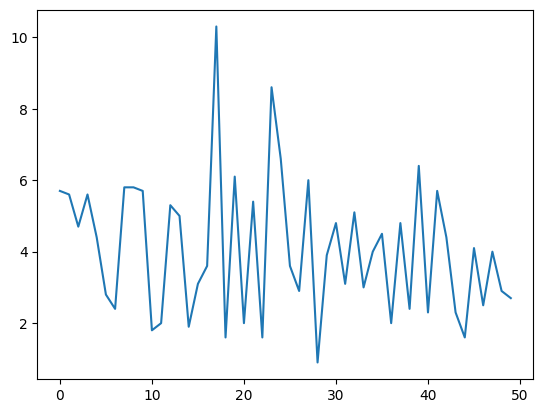

In [32]:
estado["Murder.Rate"].plot.line()

<Axes: ylabel='Frequency'>

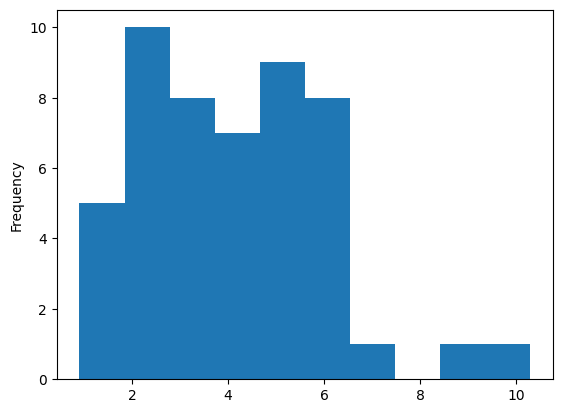

In [35]:

estado["Murder.Rate"].plot.hist()

<Axes: >

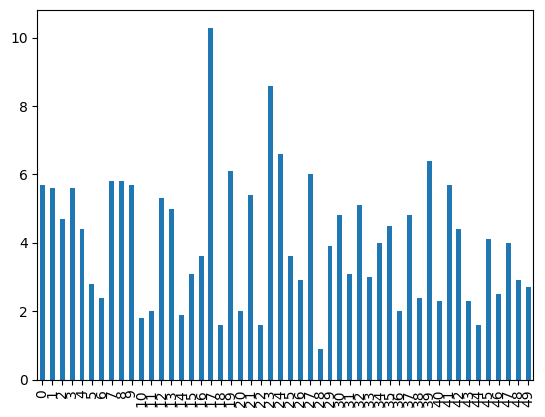

In [36]:
#Histograma
estado["Murder.Rate"].plot.bar()

<Axes: >

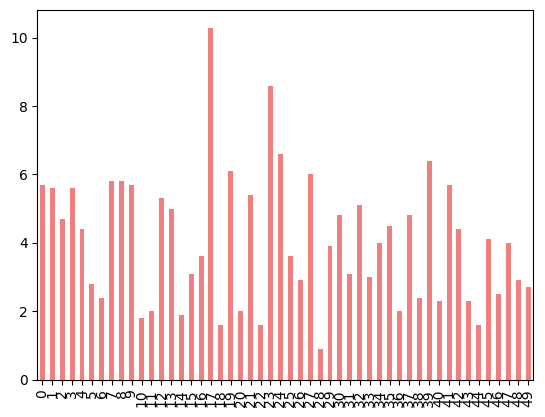

In [40]:
estado["Murder.Rate"].plot.bar(color="lightcoral")

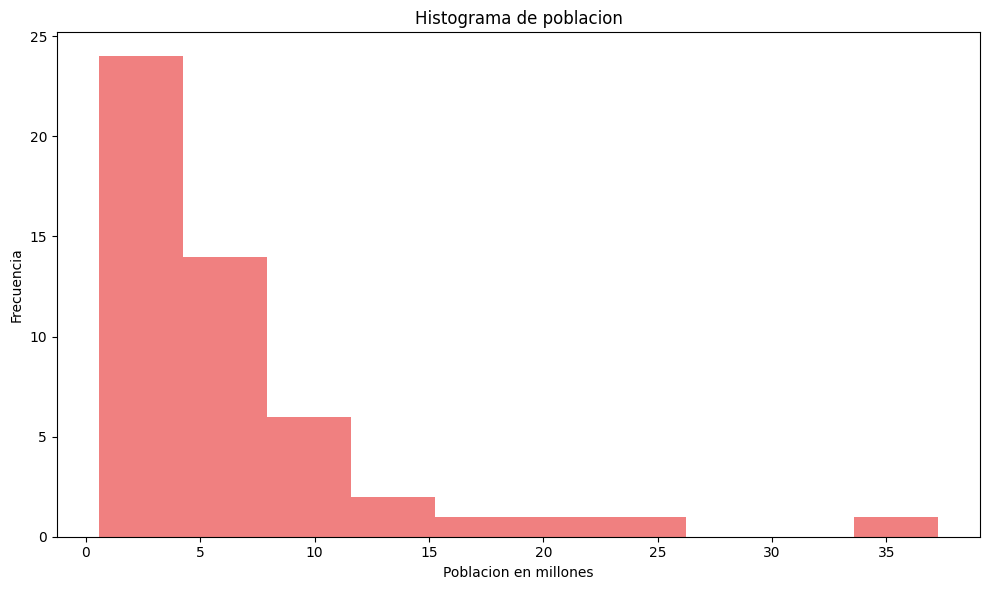

In [49]:
#Creando el eje X
ax=(estado.Population/1_000_000).plot.hist(color="lightcoral", figsize=(10,6))
ax.set_xlabel("Poblacion en millones")
ax.set_ylabel("Frecuencia")
ax.set_title("Histograma de poblacion")

plt.tight_layout()
plt.show()

#Grafica hacia la derecha, la media es mucho mayor que la mediana

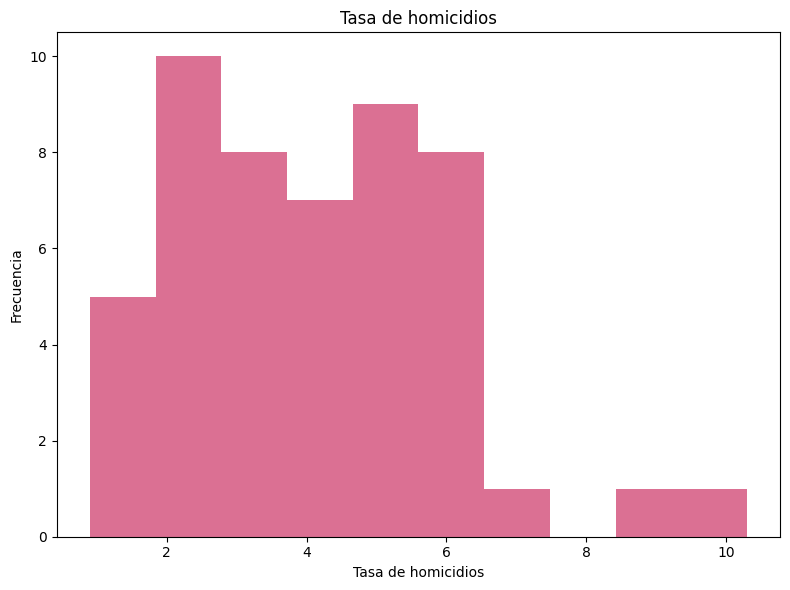

In [54]:
ax=(estado["Murder.Rate"]).plot.hist(color="palevioletred", figsize=(8,6))
ax.set_xlabel("Tasa de homicidios")
ax.set_ylabel("Frecuencia")
ax.set_title("Tasa de homicidios")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

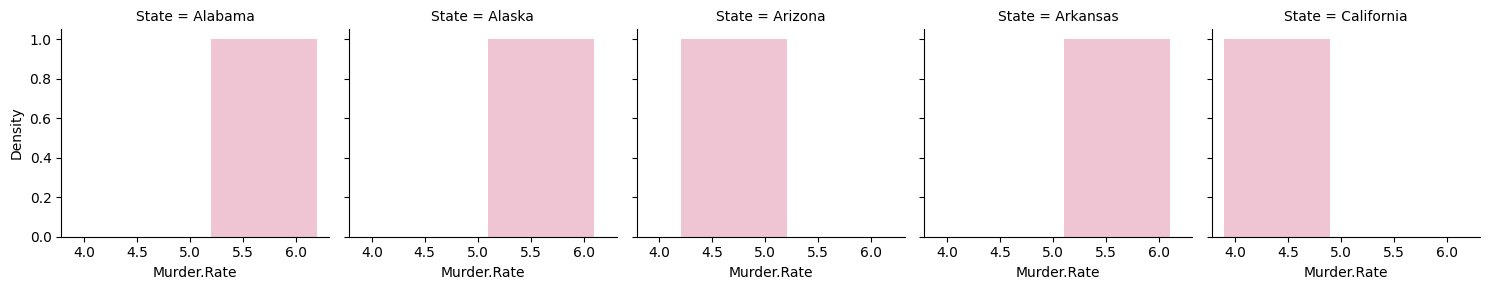

In [61]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate",color="palevioletred")